Two Node Network Analysis:

Below is the setup code to generate the data. After running this we are left with:

* A bipartite graph
* A projected graph
* Lists of the number of connections the women and events have

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

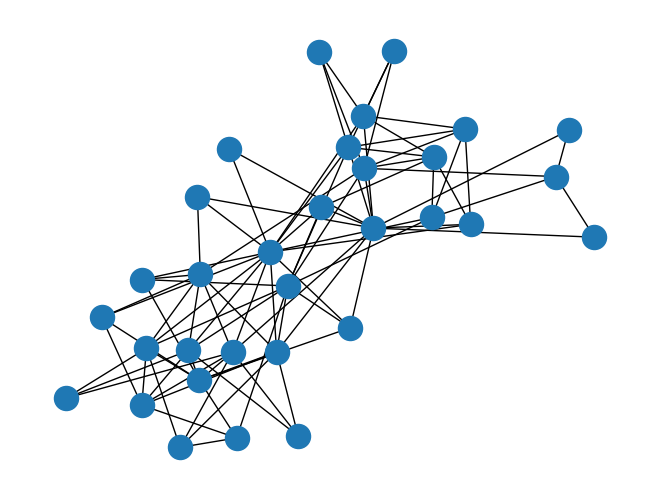

In [28]:
## Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import nxviz as nv

## Load the graph of the women

G = nx.davis_southern_women_graph()

## Create a list of the women and the events

women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
friends_list = {}
women_list = []
num_friends = []
for w in women:
    print(f"{W.degree(w)} {w}")
    women_list.append(w)
    num_friends.append(W.degree(w))
friends_list = {"Woman" : women_list, "Friends" : num_friends}
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
organizations = []
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")
    organizations.append(W.degree(w, weight='weight'))

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions

## Draw intial graph to get an idea of the data

nx.draw(G, pos)
plt.show()

Here we can see the bipartite nodes, where items with values of 0 are the women and items with 1 are the events:

In [8]:
G.nodes.data("bipartite")

NodeDataView({'Evelyn Jefferson': 0, 'Laura Mandeville': 0, 'Theresa Anderson': 0, 'Brenda Rogers': 0, 'Charlotte McDowd': 0, 'Frances Anderson': 0, 'Eleanor Nye': 0, 'Pearl Oglethorpe': 0, 'Ruth DeSand': 0, 'Verne Sanderson': 0, 'Myra Liddel': 0, 'Katherina Rogers': 0, 'Sylvia Avondale': 0, 'Nora Fayette': 0, 'Helen Lloyd': 0, 'Dorothy Murchison': 0, 'Olivia Carleton': 0, 'Flora Price': 0, 'E1': 1, 'E2': 1, 'E3': 1, 'E4': 1, 'E5': 1, 'E6': 1, 'E7': 1, 'E8': 1, 'E9': 1, 'E10': 1, 'E11': 1, 'E12': 1, 'E13': 1, 'E14': 1}, data='bipartite')

In [118]:
## Map color  to the nodes 
color_list = []
colors = bipartite.color(G)
color_dict = {0:"b", 1:"r"}
color_list = [color_dict[i[1]] for i in G.nodes.data("bipartite")]
label_dict = {0:"W", 1:"S"}
label_list = [label_dict[i[1]] for i in G.nodes.data("bipartite")]
mapping_labels = {list(dict(G.nodes.data("bipartite")).keys())[i] : label_list[i] for i in range(len(label_list))}
mapping_labels

{'Evelyn Jefferson': 'W',
 'Laura Mandeville': 'W',
 'Theresa Anderson': 'W',
 'Brenda Rogers': 'W',
 'Charlotte McDowd': 'W',
 'Frances Anderson': 'W',
 'Eleanor Nye': 'W',
 'Pearl Oglethorpe': 'W',
 'Ruth DeSand': 'W',
 'Verne Sanderson': 'W',
 'Myra Liddel': 'W',
 'Katherina Rogers': 'W',
 'Sylvia Avondale': 'W',
 'Nora Fayette': 'W',
 'Helen Lloyd': 'W',
 'Dorothy Murchison': 'W',
 'Olivia Carleton': 'W',
 'Flora Price': 'W',
 'E1': 'S',
 'E2': 'S',
 'E3': 'S',
 'E4': 'S',
 'E5': 'S',
 'E6': 'S',
 'E7': 'S',
 'E8': 'S',
 'E9': 'S',
 'E10': 'S',
 'E11': 'S',
 'E12': 'S',
 'E13': 'S',
 'E14': 'S'}

Lets plot the network in a slightly more informative way. In this plot, the red nodes represents the social events and the blue nodes represent the women.

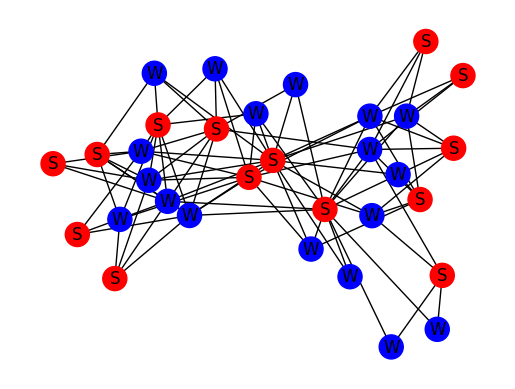

In [119]:
## Plot the network, with red representing the conventions and blue representing the women

pos = nx.spring_layout(G, seed = 554)
nx.draw_networkx_labels(G, pos, mapping_labels)
nx.draw(G, pos, node_color= color_list)
plt.show()

In [121]:
## Create a list of the events, and the amount of connections linked to them
club_connections = []

for i in G.nodes:
    if i in clubs:
        club_connections.append((G.degree[i]))
club_connections
club_dict = {"club":clubs, "connections": club_connections}

{'club': ['E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14'],
 'connections': [3, 3, 6, 4, 8, 8, 10, 14, 12, 5, 4, 6, 3, 3]}

Lets look at the edge weights of each person:

In [48]:
## Get edge weights
nx.get_edge_attributes(W,"weight")

{('Evelyn Jefferson', 'Pearl Oglethorpe'): 3,
 ('Evelyn Jefferson', 'Verne Sanderson'): 2,
 ('Evelyn Jefferson', 'Eleanor Nye'): 3,
 ('Evelyn Jefferson', 'Myra Liddel'): 2,
 ('Evelyn Jefferson', 'Ruth DeSand'): 3,
 ('Evelyn Jefferson', 'Theresa Anderson'): 7,
 ('Evelyn Jefferson', 'Frances Anderson'): 4,
 ('Evelyn Jefferson', 'Olivia Carleton'): 1,
 ('Evelyn Jefferson', 'Brenda Rogers'): 6,
 ('Evelyn Jefferson', 'Laura Mandeville'): 6,
 ('Evelyn Jefferson', 'Charlotte McDowd'): 3,
 ('Evelyn Jefferson', 'Flora Price'): 1,
 ('Evelyn Jefferson', 'Dorothy Murchison'): 2,
 ('Evelyn Jefferson', 'Helen Lloyd'): 1,
 ('Evelyn Jefferson', 'Sylvia Avondale'): 2,
 ('Evelyn Jefferson', 'Nora Fayette'): 2,
 ('Evelyn Jefferson', 'Katherina Rogers'): 2,
 ('Laura Mandeville', 'Pearl Oglethorpe'): 2,
 ('Laura Mandeville', 'Verne Sanderson'): 2,
 ('Laura Mandeville', 'Eleanor Nye'): 4,
 ('Laura Mandeville', 'Myra Liddel'): 1,
 ('Laura Mandeville', 'Ruth DeSand'): 3,
 ('Laura Mandeville', 'Theresa Anderso

Now lets use these weights to plot the connections, without the conventions. This will allow us to visually determine the important women in the network

<Figure size 1500x1000 with 0 Axes>

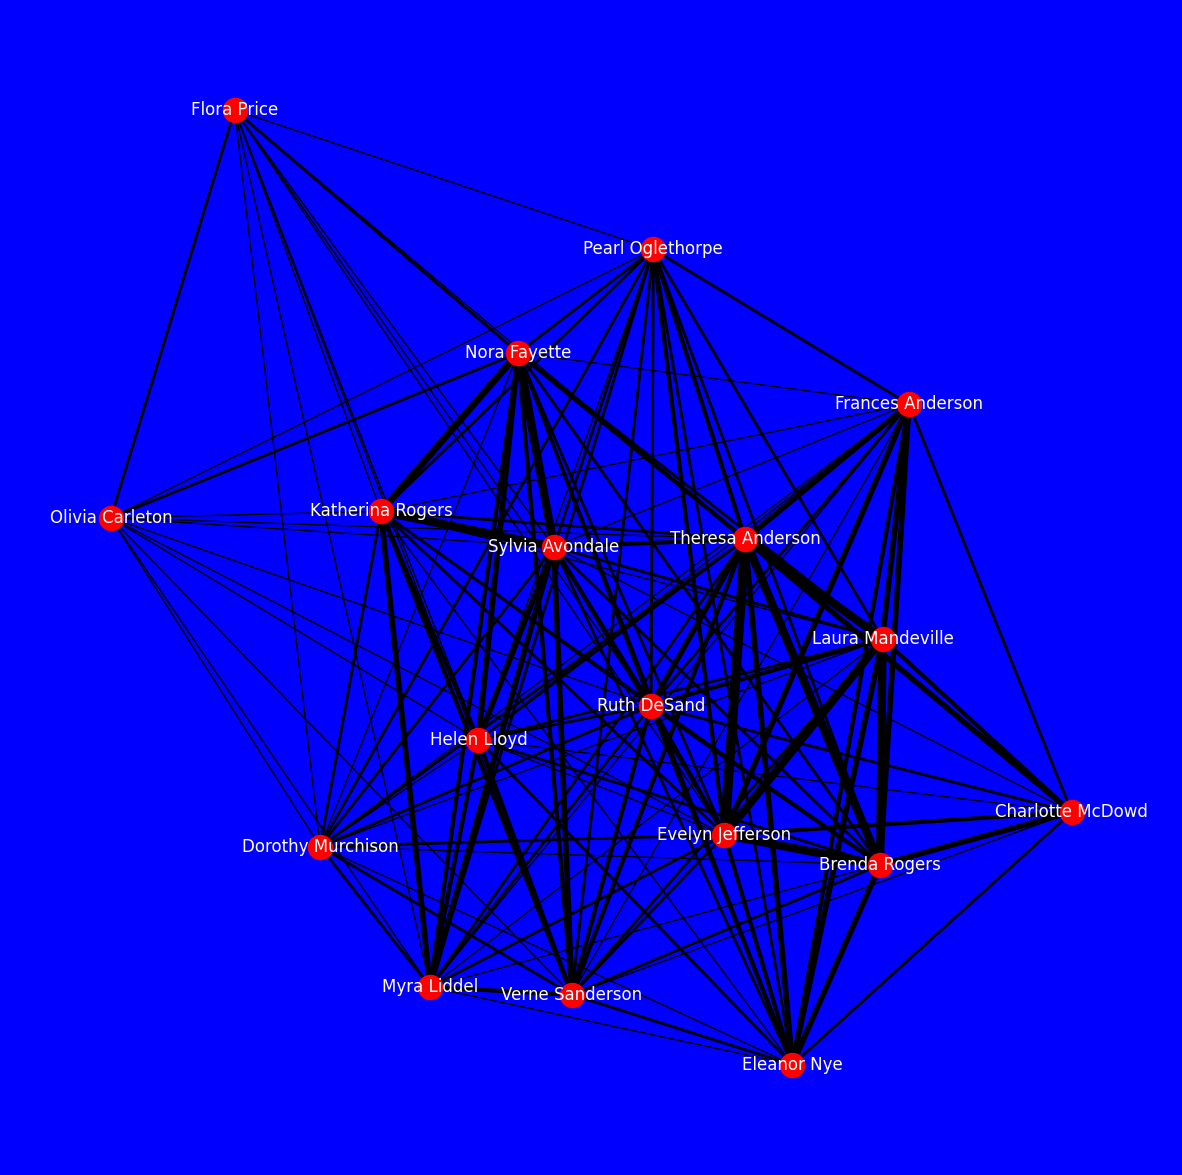

In [93]:
widths = nx.get_edge_attributes(W,"weight")
nodelist = W.nodes()
plt.figure(figsize=(15,10))

pos = nx.spring_layout(W, seed = 551)
fig,ax = plt.subplots()

ax.axis("off")
fig.set_facecolor("blue")
fig.set_size_inches(15,15)
nx.draw_networkx_nodes(W,pos,
                       nodelist = nodelist, node_color= "red")
nx.draw_networkx_edges(W, pos, edgelist = widths.keys(),
                       width = list(widths.values()))
nx.draw_networkx_labels(W,pos = pos, labels = dict(zip(nodelist, nodelist)), font_color = "white")
plt.box(False)
plt.show()

<Figure size 1200x800 with 0 Axes>

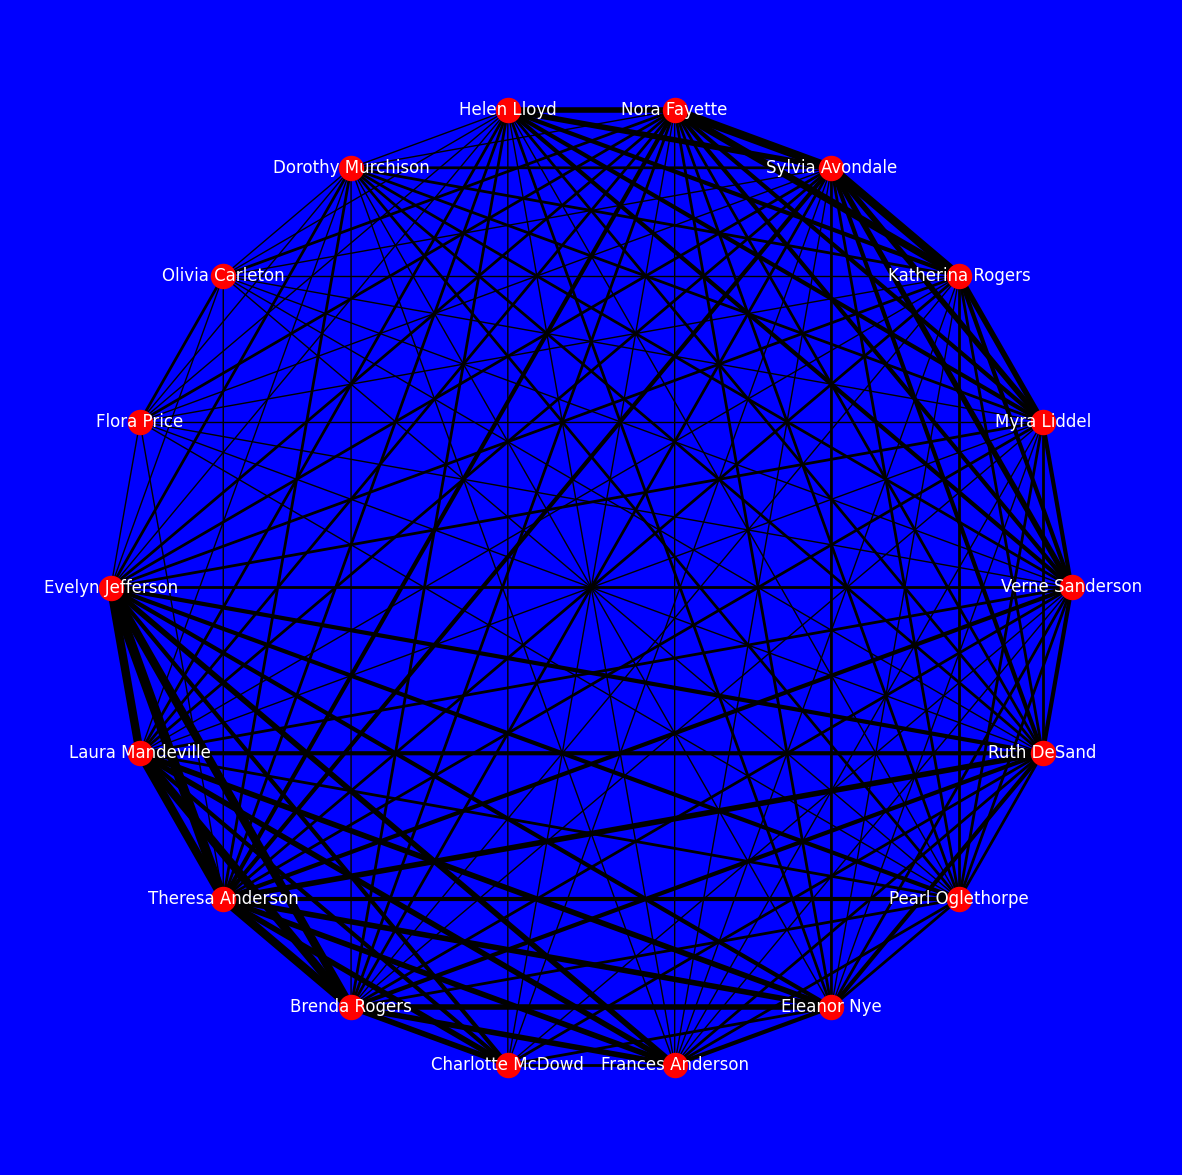

In [92]:
widths = nx.get_edge_attributes(W,"weight")
nodelist = W.nodes()
plt.figure(figsize=(12,8))
fig,ax = plt.subplots()
ax.axis("off")
fig.set_facecolor("blue")
fig.set_size_inches(15,15)
pos = nx.shell_layout(W)
nx.draw_networkx_nodes(W,pos,
                       nodelist = nodelist, node_color = "red")
nx.draw_networkx_edges(W, pos, edgelist = widths.keys(),
                       width = list(widths.values()))
nx.draw_networkx_labels(W, pos = pos,labels = dict(zip(nodelist, nodelist)), font_color = "white")
plt.box(False)
plt.show()

Based on this plot, we can tell that Evelyn Jefferson, Laura Mandeville, Theresa Anderson, Brenda Rogers, Sylvia Avondale and Nora Fayette are some of the most connected in the network. They have large edge weights, meaning that they were a member of many organizations.

In [35]:
friends_df = pd.DataFrame(data = friends_list)
friends_df["number of organizations"] = organizations

friends_df.sort_values(by = ["number of organizations"],  ascending= False)

,Woman,Friends,number of organizations
2,Theresa Anderson,17,57
0,Evelyn Jefferson,17,50
3,Brenda Rogers,15,46
12,Sylvia Avondale,17,46
1,Laura Mandeville,15,45
13,Nora Fayette,17,43
8,Ruth DeSand,17,40
9,Verne Sanderson,17,38
11,Katherina Rogers,16,37
6,Eleanor Nye,15,36


In [37]:
friends_df.sort_values(by = ["Friends"], ascending = False )

,Woman,Friends,number of organizations
0,Evelyn Jefferson,17,50
8,Ruth DeSand,17,40
14,Helen Lloyd,17,34
13,Nora Fayette,17,43
12,Sylvia Avondale,17,46
9,Verne Sanderson,17,38
2,Theresa Anderson,17,57
7,Pearl Oglethorpe,16,31
10,Myra Liddel,16,33
11,Katherina Rogers,16,37


We can also look at the women in terms of degree centrality:

In [97]:
dcs = pd.Series(nx.degree_centrality(W))
dcs.sort_values(ascending= False).head(18)

Evelyn Jefferson     1.000000
Ruth DeSand          1.000000
Helen Lloyd          1.000000
Nora Fayette         1.000000
Sylvia Avondale      1.000000
Verne Sanderson      1.000000
Theresa Anderson     1.000000
Pearl Oglethorpe     0.941176
Myra Liddel          0.941176
Katherina Rogers     0.941176
Dorothy Murchison    0.941176
Eleanor Nye          0.882353
Frances Anderson     0.882353
Laura Mandeville     0.882353
Brenda Rogers        0.882353
Olivia Carleton      0.705882
Flora Price          0.705882
Charlotte McDowd     0.647059
dtype: float64

Now the Club Data:

In [54]:
club_df = pd.DataFrame(data = club_dict)
club_df.sort_values(by = ["connections"], ascending= False)

,club,connections
7,E8,14
8,E9,12
6,E7,10
4,E5,8
5,E6,8
2,E3,6
11,E12,6
9,E10,5
3,E4,4
10,E11,4


Of all of the events, we can see that E8, E9, and E7 are the most attended.

Conclusions that can be made:

